In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,6)
import warnings
warnings.filterwarnings('ignore')
warnings.warn('this will not show')
import io

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
df=pd.read_csv('gdrive/My Drive/gene_expression.csv')
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


### Explaratory Data Analysis and Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [8]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [9]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

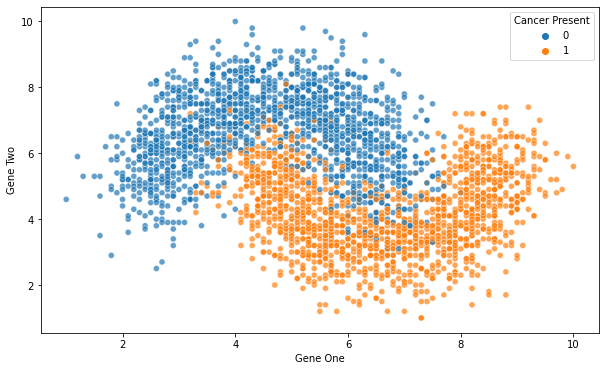

In [10]:
sns.scatterplot(x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', data= df, alpha = 0.7);

(4.0, 8.0)

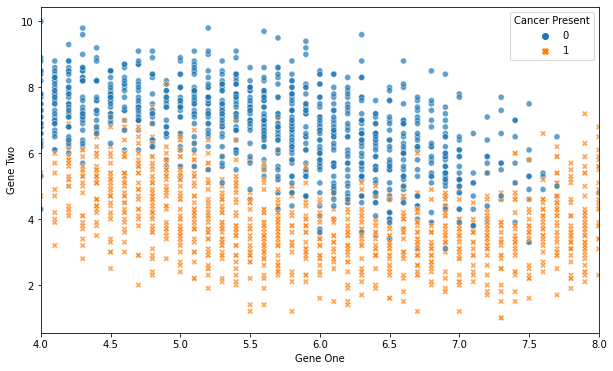

In [11]:
sns.scatterplot(x = 'Gene One', y = 'Gene Two', hue = 'Cancer Present', data = df, alpha = 0.7, style = 'Cancer Present')
plt.xlim(2,6)
plt.xlim(4,8)

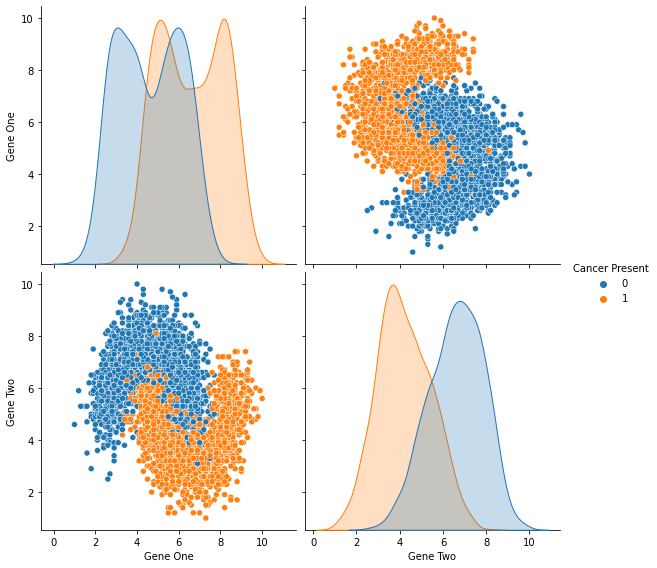

In [12]:
sns.pairplot(data = df, hue = 'Cancer Present', height = 4, aspect = 1);

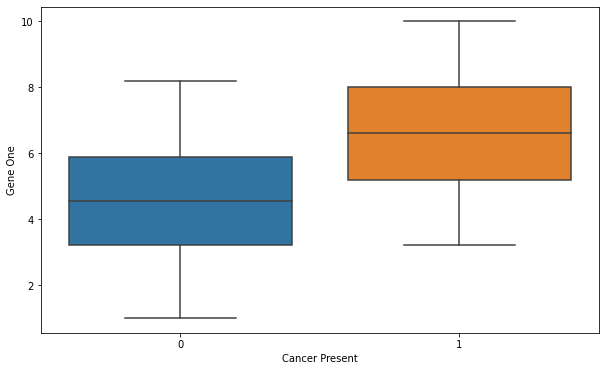

In [13]:
sns.boxplot(x = 'Cancer Present', y = 'Gene One', data = df);

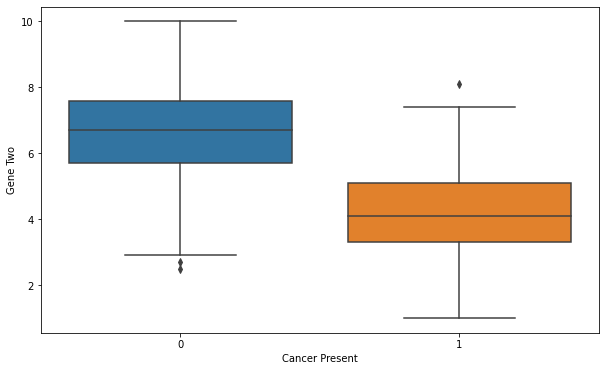

In [14]:
sns.boxplot(x = 'Cancer Present', y = 'Gene Two', data = df);

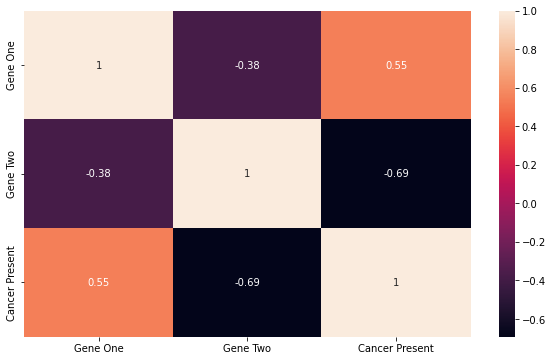

In [15]:
sns.heatmap(df.corr(), annot = True)

### Train | Test Split and Scaling Data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modeling

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [23]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [25]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [26]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
895,0.4,0.6
896,1.0,0.0
897,0.0,1.0
898,0.0,1.0


In [27]:
my_dict = {'Actual': y_test, 'Pred': y_pred, 'Proba_1': y_pred_proba[:,1], 'Proba_0': y_pred_proba[:,0]}

In [28]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
1055,1,1,1.0,0.0
175,0,0,0.2,0.8
1582,1,0,0.4,0.6
2186,0,0,0.0,1.0
183,1,1,1.0,0.0
2497,1,1,0.8,0.2
1861,0,0,0.0,1.0
1960,0,0,0.0,1.0
365,0,0,0.2,0.8
2025,1,1,1.0,0.0


### Model Performance on Classification Tasks

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [30]:
confusion_matrix(y_test, y_pred)

array([[439,  31],
       [ 34, 396]])

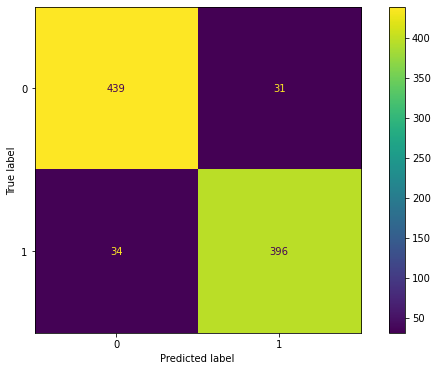

In [31]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[439  31]
 [ 34 396]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



### Elbow Method for Choosing Reasonable K Values

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [34]:
test_error_rates = []

In [35]:
for k in range(1, 30):
  knn_model = KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train_scaled, y_train)

  y_pred_test = knn_model.predict(X_test_scaled)

  test_error = 1 - accuracy_score(y_test, y_pred_test)

  test_error_rates.append(test_error)

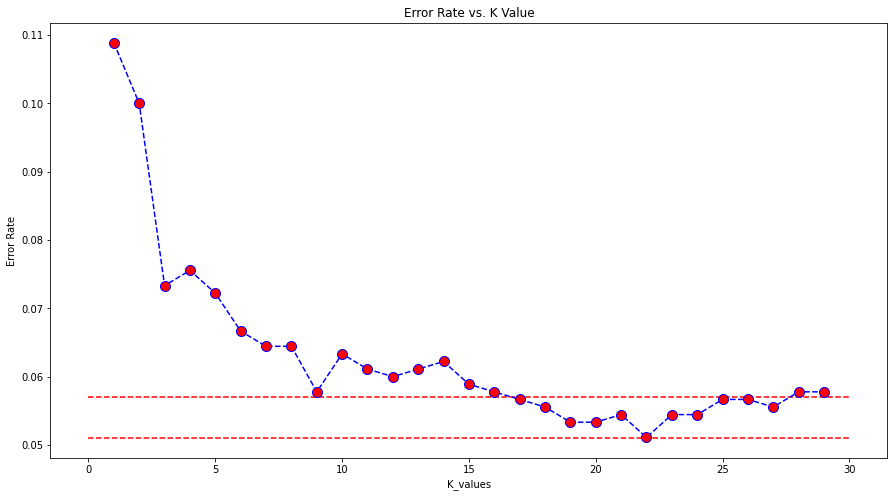

In [36]:
plt.figure(figsize = (15, 8))
plt.plot(range(1, 30), test_error_rates, color = 'blue', linestyle = '--', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y = 0.051, xmin = 0, xmax = 30, colors = 'r', linestyles = '--')
plt.hlines(y = 0.057, xmin = 0, xmax = 30, colors = 'r', linestyles = '--')

### Scores by Various K Values

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_pred = model.predict(X_test)

  print('Test_Set\n')
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print()
  print('Train_Set\n')
  print(confusion_matrix(y_train, y_train_pred))
  print(classification_report(y_train, y_train_pred))

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(X_train_scaled, y_train)
print('WITH K = 1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K = 1

Test_Set

[[422  48]
 [ 50 380]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       470
           1       0.89      0.88      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900


Train_Set

[[1005   25]
 [  22 1048]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1030
           1       0.98      0.98      0.98      1070

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [40]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train_scaled, y_train)
print('WITH K = 22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K = 22

Test_Set

[[452  18]
 [ 28 402]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.96      0.93      0.95       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900


Train_Set

[[ 960   70]
 [  68 1002]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.94      0.94      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Cross Validate For Optimal K Value

In [41]:
from sklearn.model_selection import cross_val_score, cross_validate

In [42]:
model = KNeighborsClassifier(n_neighbors=9)

In [43]:
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

In [44]:
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002406,0.012479,0.919048,0.924528,0.915888,0.920188
2,0.001617,0.009958,0.942857,0.935780,0.953271,0.944444
3,0.001675,0.010000,0.947619,0.970588,0.925234,0.947368
4,0.001629,0.009437,0.871429,0.877358,0.869159,0.873239
5,0.001539,0.009777,0.923810,0.909910,0.943925,0.926606
6,0.001559,0.009211,0.909524,0.915094,0.906542,0.910798
7,0.001488,0.009227,0.942857,0.927928,0.962617,0.944954
8,0.001488,0.009364,0.938095,0.927273,0.953271,0.940092
9,0.001518,0.009235,0.961905,0.980583,0.943925,0.961905
10,0.001538,0.009271,0.895238,0.869565,0.934579,0.900901


In [45]:
df_scores.mean()[2:]

test_accuracy     0.925238
test_precision    0.923861
test_recall       0.930841
test_f1           0.927050
dtype: float64

### Predict New Observation

In [46]:
new_observation = [[3.5, 4.3]]

In [47]:
knn_model.predict(new_observation)

array([1])

In [48]:
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-1.1393583 , -0.62176572]])

In [49]:
knn_model.predict(new_observation_scaled)

array([0])

In [50]:
knn_model.predict_proba(new_observation_scaled)

array([[0.62068966, 0.37931034]])

### Grid Search Method for Choosing Reasonable K Values

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
knn_grid = KNeighborsClassifier()

In [53]:
k_values = range(1, 30)

In [54]:
param_grid = {'n_neighbors': k_values, 'p': [1, 2], 'weights': ['uniform', 'distance']}

In [55]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = 'accuracy')

In [56]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
knn_grid_model.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [58]:
print('WITH K = 21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K = 21

Test_Set

[[447  23]
 [ 27 403]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900


Train_Set

[[957  73]
 [ 71 999]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.93      0.93      0.93      1070

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



### Evaluating ROC Curves and AUC

In [59]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train_scaled, y_train)

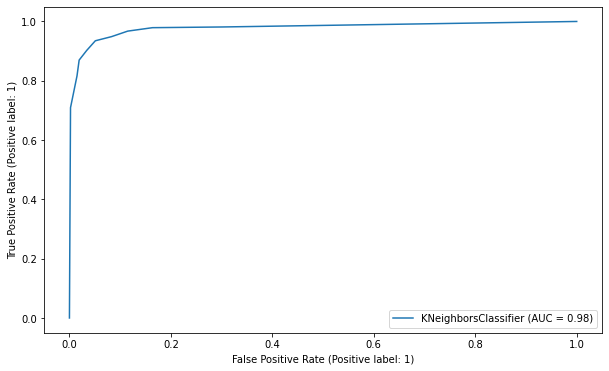

In [61]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

In [62]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9781444829292429

### Final Model and Model Deployment

In [63]:
import pickle

In [64]:
scaler  = StandardScaler()

In [65]:
scaler.fit(X)

StandardScaler()

In [66]:
X_scaled = scaler.transform(X)

In [67]:
final_knn_model = KNeighborsClassifier(n_neighbors=9)

In [68]:
pickle.dump(final_knn_model, open('knn_final.pkl', 'wb'))

In [69]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

### Predict New Observations

In [70]:
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [71]:
loaded_model = pickle.load(open('knn_final.pkl', 'rb'))

In [72]:
X.columns

Index(['Gene One', 'Gene Two'], dtype='object')

In [73]:
X.describe()

,Gene One,Gene Two
count,3000.000000,3000.000000
mean,5.600133,5.410467
std,1.828388,1.729081
min,1.000000,1.000000
25%,4.300000,4.000000
50%,5.600000,5.400000
75%,6.900000,6.700000
max,10.000000,10.000000


In [74]:
new_obs = {'Gene One': [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           'Gene Two': [1, 4, 4, 5.5, 6.7, 10, 8, 1]}

In [75]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [76]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-2.51637037e+00, -2.55118325e+00],
       [-1.42232801e+00, -8.15868071e-01],
       [-7.11200471e-01, -8.15868071e-01],
       [-7.29361574e-05,  5.17895174e-02],
       [ 7.65756716e-01,  7.45915588e-01],
       [ 2.13330967e+00,  2.65476228e+00],
       [-1.96934919e+00,  1.49788550e+00],
       [ 2.18735536e-01, -2.55118325e+00]])

In [77]:
loaded_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=9)

In [78]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [79]:
samples['pred'] = predictions
samples['pred_proba_1'] = predictions_proba[:,1]
samples['pred_proba_0'] = predictions_proba[:,0]
samples

,Gene One,Gene Two,pred,pred_proba_1,pred_proba_0
0,1.0,1.0,0,0.000000,1.000000
1,3.0,4.0,0,0.111111,0.888889
2,4.3,4.0,1,1.000000,0.000000
3,5.6,5.5,0,0.222222,0.777778
4,7.0,6.7,0,0.000000,1.000000
5,9.5,10.0,1,0.666667,0.333333
6,2.0,8.0,0,0.000000,1.000000
7,6.0,1.0,1,1.000000,0.000000


### Pipeline

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
operations = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

In [82]:
Pipeline(steps = operations)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [83]:
pipe_model = Pipeline(steps = operations)

In [84]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [85]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

### Model Performance

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

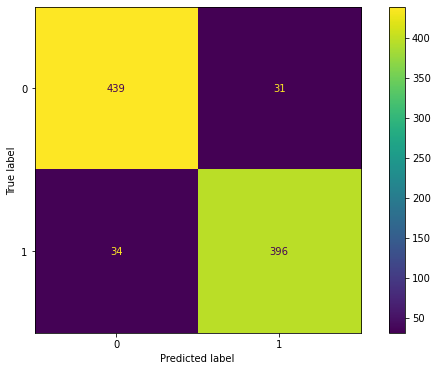

In [87]:
plot_confusion_matrix(pipe_model, X_test, y_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       470
           1       0.93      0.92      0.92       430

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900



### Changing the Parameters of the pipe_model

In [89]:
pipe_model.get_params()

{'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False}

In [90]:
pipe_model.set_params(knn__n_neighbors = 9)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [91]:
pipe_model['scaler']

StandardScaler()

In [92]:
pipe_model['knn']

KNeighborsClassifier(n_neighbors=9)

### GridSearch on Pipeline

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {'knn__n_neighbors': range(1, 30)}
pipe_model = Pipeline(steps = operations)

In [95]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv = 10, scoring = 'f1')

In [96]:
pipe_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [97]:
pipe_grid.best_params_

{'knn__n_neighbors': 21}

### CrossValidate on Pipeline

In [98]:
operations = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=9))]
model = Pipeline(operations)

In [99]:
scores = cross_validate(model, X_train, y_train, scoring = ['precision', 'recall', 'f1', 'accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision    0.923029
test_recall       0.931776
test_f1           0.927106
test_accuracy     0.925238
dtype: float64

### Final pipe_model

In [100]:
operations = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=9))]

In [101]:
pipe_final = Pipeline(operations)

In [102]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

### Predict New Observations with pipe_model

In [103]:
new_obs = {'Gene One': [1, 3, 4.3, 5.6, 7, 9.5, 2, 6],
           'Gene Two': [1, 4, 4, 5.5, 6.7, 10, 8, 1]}

In [104]:
samples = pd.DataFrame(new_obs)
samples

,Gene One,Gene Two
0,1.0,1.0
1,3.0,4.0
2,4.3,4.0
3,5.6,5.5
4,7.0,6.7
5,9.5,10.0
6,2.0,8.0
7,6.0,1.0


In [105]:
predictions = pipe_final.predict(samples)
predictions

array([0, 0, 1, 0, 0, 1, 0, 1])

In [106]:
predictions_proba = pipe_final.predict_proba(samples)
predictions_proba

array([[1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.        , 1.        ],
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ]])